# Telco Churn

In this example, we use the Telco Churn dataset to predict which Telco user is likely to churn; that is, customers that will likely stop using Telco. You can download the Jupyter Notebook of the study <a href="churn.ipynb">here</a> and the dataset from <a href="https://www.kaggle.com/blastchar/telco-customer-churn">Kaggle</a>.

<ul class="ul_content">    
    <li>Churn - customers that left within the last month</li>
    <li>Services - services of each customer (phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies)</li>
    <li>Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges</li>
    <li>Customer demographics - gender, age range, and if they have partners and dependents</li>
</ul>

We will follow the data science cycle (Data Exploration - Data Preparation - Data Modeling - Model Evaluation - Model Deployment) to solve this problem.

## Initialization

Let's create the Virtual DataFrame of the dataset.

In [1]:
from verticapy import *
print(verticapy.__version__)

0.6.0


In [7]:
conn_info = {'host': '172.16.61.170', 
             'port': 5433, 
             'user': "dbadmin", 
             'password': "password", 
             'database': "test"}
from verticapy.connect import *
# Save a new connection
new_auto_connection(conn_info, name = "pranjs_cluster")
# Set the main auto connection
change_auto_connection("pranjs_cluster")

In [8]:
read_auto_connect()

In [11]:
drop_table(name = 'public.churn')
read_csv("churn.csv",
        schema = 'public',
        table_name = 'churn',
        genSQL = True)

CREATE TABLE "public"."churn"("customerID" Varchar(20), "gender" Varchar(20), "SeniorCitizen" Integer, "Partner" Boolean, "Dependents" Boolean, "tenure" Integer, "PhoneService" Boolean, "MultipleLines" Varchar(100), "InternetService" Varchar(22), "OnlineSecurity" Varchar(38), "OnlineBackup" Varchar(38), "DeviceProtection" Varchar(38), "TechSupport" Varchar(38), "StreamingTV" Varchar(38), "StreamingMovies" Varchar(38), "Contract" Varchar(28), "PaperlessBilling" Boolean, "PaymentMethod" Varchar(50), "MonthlyCharges" Numeric(8,3), "TotalCharges" Numeric(9,3), "Churn" Boolean);
COPY "public"."churn"("customerID", "gender", "SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges", "Churn") FROM {} DELIMITER ',' NULL '' ENCLOSED BY '"' ESCAPE AS '\' SKIP 1;


In [12]:
read_csv("churn.csv",
        schema = 'public',
        table_name = 'churn')
        #genSQL = True    
churn = vDataFrame('public.churn')

The table "public"."churn" has been successfully created.


customerID    gender    SeniorCitizen    Partner    Dependents   \\
1      0002-ORFBO    Female                0       True          True   \\
2      0013-MHZWF    Female                0      False          True   \\
3      0014-BMAQU      Male                0       True         False   \\
4      0018-NYROU    Female                0       True         False   \\
5      0019-EFAEP    Female                0      False         False   \\
6      0020-JDNXP    Female                0       True          True   \\
7      0022-TCJCI      Male                1      False         False   \\
8      0023-HGHWL      Male                1      False         False   \\
9      0023-XUOPT    Female                0       True         False   \\
10     0030-FNXPP    Female                0      False         False   \\
11     0031-PVLZI    Female                0       True          True   \\
12     0052-DCKON      Male                0       True         False   \\
13     0057-QBUQH    Female                0      False          True   \\
14     0068-FIGTF    Female                0      False         False   \\
15     0074-HDKDG      Male                0       True          True   \\
16     0106-GHRQR      Male                0      False         False   \\
17     0106-UGRDO    Female                0       True         False   \\
18     0107-WESLM      Male                0      False         False   \\
19     0114-IGABW    Female                0       True         False   \\
20     0114-PEGZZ    Female                0      False         False   \\
21     0115-TFERT      Male                0       True         False   \\
22     0121-SNYRK      Male                0      False         False   \\
23     0125-LZQXK      Male                0      False         False   \\
24     0133-BMFZO    Female                0      False         False   \\
25     0137-OCGAB    Female                0      False         False   \\
26     0137-UDEUO    Female                0      False         False   \\
27     0139-IVFJG    Female                0       True         False   \\
28     0147-ESWWR    Female                1       True         False   \\
29     0151-ONTOV    Female                0      False         False   \\
30     0164-XAIRP    Female                0      False         False   \\
31     0168-XZKBB    Female                0       True         False   \\
32     0178-SZBHO      Male                0       True          True   \\
33     0187-WZNAB    Female                0       True          True   \\
34     0188-GWFLE      Male                0      False         False   \\
35     0195-IESCP      Male                0       True         False   \\
36     0196-JTUQI    Female                0      False         False   \\
37     0197-PNKNK    Female                0       True          True   \\
38     0208-BPQEJ    Female                0       True          True   \\
39     0212-ISBBF    Female                0      False         False   \\
40     0219-YTZUE      Male                0       True          True   \\
41     0220-EBGCE      Male                0      False         False   \\
42     0221-WMXNQ      Male                1      False         False   \\
43     0224-HJAPT      Male                0      False         False   \\
44     0224-RLWWD    Female                1      False         False   \\
45     0229-LFJAF      Male                0      False         False   \\
46     0230-UBYPQ      Male                1       True         False   \\
47     0230-WEQUW      Male                0       True         False   \\
48     0233-FTHAV    Female                0      False         False   \\
49     0236-HFWSV      Male                0      False         False   \\
50     0247-SLUJI      Male                0       True          True   \\
51     0254-FNMCI    Female                0      False         False   \\
52     0254-KCJGT      Male                0       True         False   \\
53     0256-LTHVJ    Female     
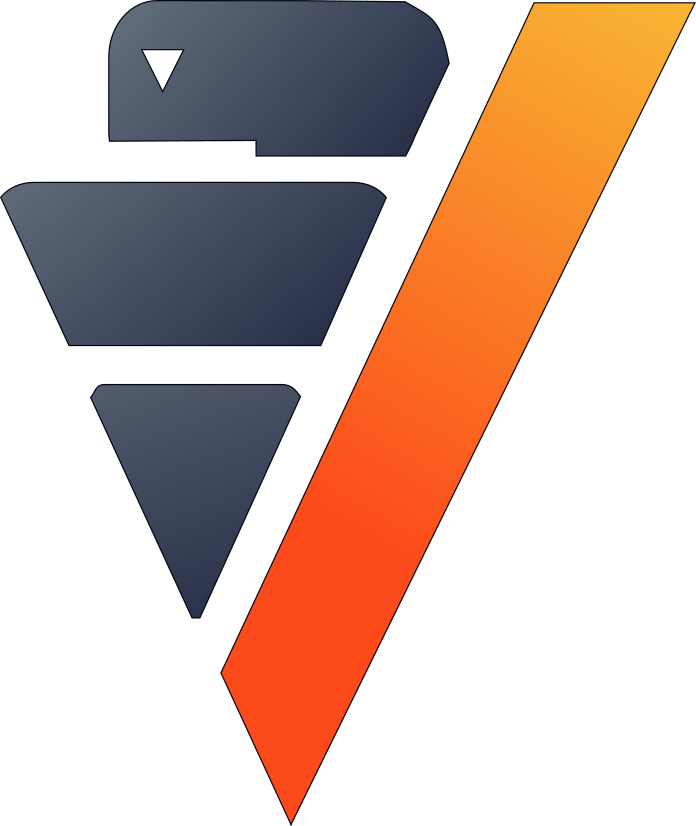

In [13]:
churn

In [9]:
%load_ext verticapy.sql

table_schema_id    table_schema             table_id   \\
1     45035996273704980          public    45035996273883114   \\
2     45035996273704980          public    45035996273920254   \\
3     45035996273704980          public    45035996273943578   \\
4     45035996273704980          public    45035996274049366   \\
5     45035996273704980          public    45035996274101994   \\
6     45035996273704980          public    45035996275726434   \\
7     45035996273704980          public    45035996275875708   \\
8     45035996273883376             NBA    45035996275883278   \\
9     45035996273704980          public    45035996275982466   \\
10    45035996273704980          public    45035996275984144   \\
11    45035996273704980          public    45035996275984868   \\
12    45035996273704980          public    45035996275985018   \\
13    45035996273704980          public    45035996275992006   \\
14    45035996273704980          public    45035996275992008   \\
15    45035996273704980          public    45035996276001408   \\
16    45035996273704980          public    45035996276001518   \\
17    45035996273704980          public    45035996276001628   \\
18    45035996273704980          public    45035996276001736   \\
19    45035996273704980          public    45035996276001738   \\
20    45035996273704980          public    45035996276001740   \\
21    45035996273704980          public    45035996276001934   \\
22    45035996273704980          public    45035996276001982   \\
23    45035996273704980          public    45035996276002030   \\
24    45035996273704980          public    45035996276002078   \\
25    45035996273704980          public    45035996276002162   \\
26    45035996273704980          public    45035996276002222   \\
27    45035996273704980          public    45035996276002282   \\
28    45035996273704980          public    45035996276002284   \\
29    45035996273704980          public    45035996276002286   \\
30    45035996273704980          public    45035996276002426   \\
31    45035996273704980          public    45035996276002566   \\
32    45035996273704980          public    45035996276002704   \\
33    45035996273704980          public    45035996276002706   \\
34    45035996273704980          public    45035996276003178   \\
35    45035996273704980          public    45035996276003280   \\
36    45035996273704980          public    45035996276004020   \\
37    45035996273704980          public    45035996276006358   \\
38    45035996273704980          public    45035996276076850   \\
39    45035996273704980          public    45035996276077050   \\
40    45035996276139716             geo    45035996276139748   \\
41    45035996276139716             geo    45035996276140028   \\
42    45035996273704980          public    45035996276184872   \\
43    45035996273704980          public    45035996276185136   \\
44    45035996273704980          public    45035996276185480   \\
45    45035996273704980          public    45035996276185676   \\
46    45035996273704980          public    45035996276185886   \\
47    45035996273704980          public    45035996276186068   \\
48    45035996273704980          public    45035996276186276   \\
49    45035996273704980          public    45035996276186358   \\
50    45035996273704980          public    45035996276192396   \\
51    45035996273704980          public    45035996276192448   \\
52    45035996273704980          public    45035996276192498   \\
53    45035996273704980          public    45035996276192548   \\
54    45035996273704980          public    45035996276390784   \\
55    45035996273704980          public    45035996276390928   \\
56    45035996273704980          public    45035996276391064   \\
57    45035996273704980          public    45035996276392748   \\
58    45035996273704980          public    45035996276392794   \\
59    45035996273704980          public    45035996276392906   \\
60    45035996273704980          public    45035
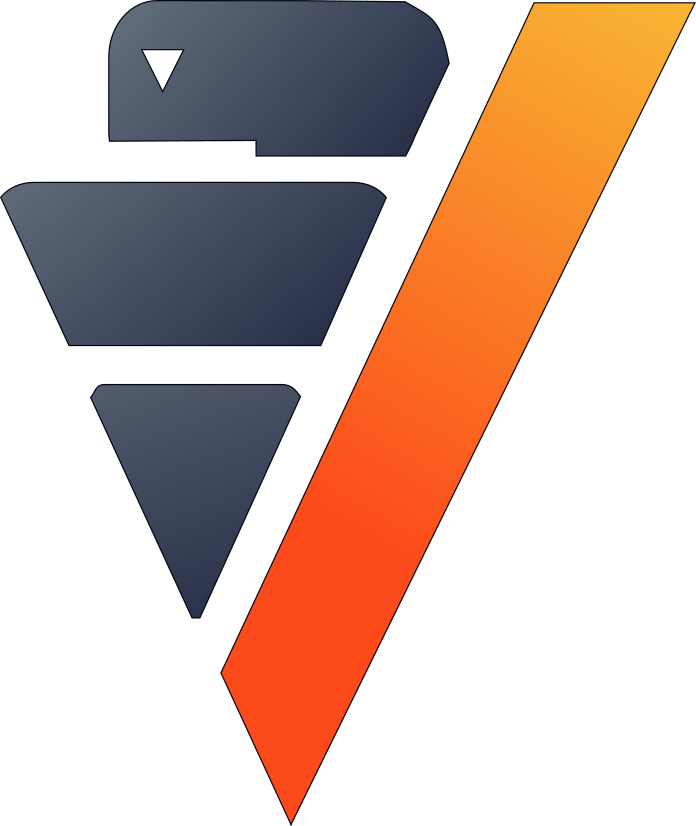

In [10]:
%%sql
SELECT * From tables;

customerID    gender    SeniorCitizen    Partner    Dependents   \\
1      0002-ORFBO    Female                0       True          True   \\
2      0013-MHZWF    Female                0      False          True   \\
3      0014-BMAQU      Male                0       True         False   \\
4      0018-NYROU    Female                0       True         False   \\
5      0019-EFAEP    Female                0      False         False   \\
6      0020-JDNXP    Female                0       True          True   \\
7      0022-TCJCI      Male                1      False         False   \\
8      0023-HGHWL      Male                1      False         False   \\
9      0023-XUOPT    Female                0       True         False   \\
10     0030-FNXPP    Female                0      False         False   \\
11     0031-PVLZI    Female                0       True          True   \\
12     0052-DCKON      Male                0       True         False   \\
13     0057-QBUQH    Female                0      False          True   \\
14     0068-FIGTF    Female                0      False         False   \\
15     0074-HDKDG      Male                0       True          True   \\
16     0106-GHRQR      Male                0      False         False   \\
17     0106-UGRDO    Female                0       True         False   \\
18     0107-WESLM      Male                0      False         False   \\
19     0114-IGABW    Female                0       True         False   \\
20     0114-PEGZZ    Female                0      False         False   \\
21     0115-TFERT      Male                0       True         False   \\
22     0121-SNYRK      Male                0      False         False   \\
23     0125-LZQXK      Male                0      False         False   \\
24     0133-BMFZO    Female                0      False         False   \\
25     0137-OCGAB    Female                0      False         False   \\
26     0137-UDEUO    Female                0      False         False   \\
27     0139-IVFJG    Female                0       True         False   \\
28     0147-ESWWR    Female                1       True         False   \\
29     0151-ONTOV    Female                0      False         False   \\
30     0164-XAIRP    Female                0      False         False   \\
31     0168-XZKBB    Female                0       True         False   \\
32     0178-SZBHO      Male                0       True          True   \\
33     0187-WZNAB    Female                0       True          True   \\
34     0188-GWFLE      Male                0      False         False   \\
35     0195-IESCP      Male                0       True         False   \\
36     0196-JTUQI    Female                0      False         False   \\
37     0197-PNKNK    Female                0       True          True   \\
38     0208-BPQEJ    Female                0       True          True   \\
39     0212-ISBBF    Female                0      False         False   \\
40     0219-YTZUE      Male                0       True          True   \\
41     0220-EBGCE      Male                0      False         False   \\
42     0221-WMXNQ      Male                1      False         False   \\
43     0224-HJAPT      Male                0      False         False   \\
44     0224-RLWWD    Female                1      False         False   \\
45     0229-LFJAF      Male                0      False         False   \\
46     0230-UBYPQ      Male                1       True         False   \\
47     0230-WEQUW      Male                0       True         False   \\
48     0233-FTHAV    Female                0      False         False   \\
49     0236-HFWSV      Male                0      False         False   \\
50     0247-SLUJI      Male                0       True          True   \\
51     0254-FNMCI    Female                0      False         False   \\
52     0254-KCJGT      Male                0       True         False   \\
53     0256-LTHVJ    Female     
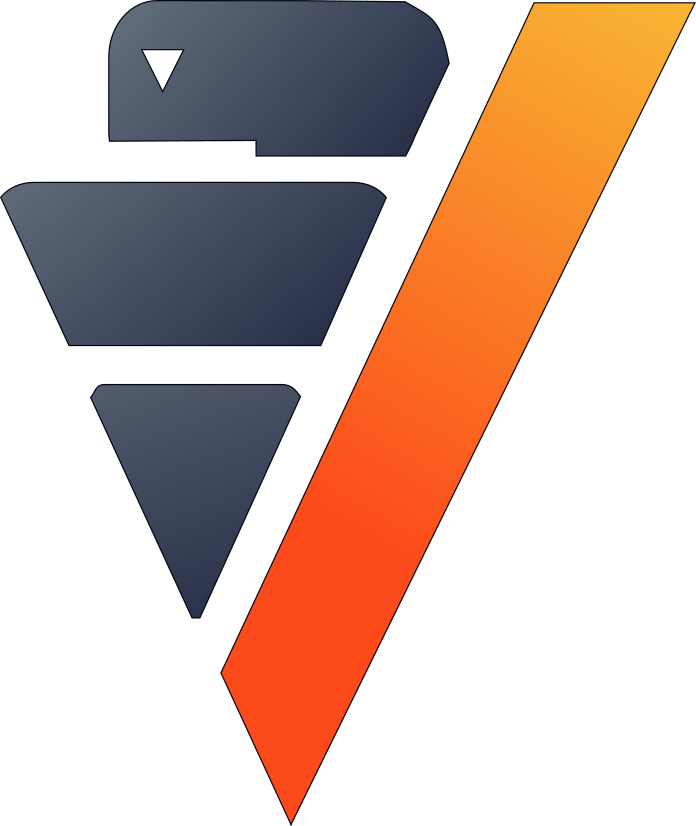

In [14]:
%%sql
SELECT * From churn;

## Data Exploration and Preparation

Let's examine our data.

In [23]:
set_option("sql_on", True)

In [25]:
set_option("sql_on", False)

customerID    gender    SeniorCitizen    Partner    Dependents   \\
1      0003-MKNFE      Male                0      False         False   \\
2      0004-TLHLJ      Male                0      False         False   \\
3      0011-IGKFF      Male                1       True         False   \\
4      0015-UOCOJ    Female                1      False         False   \\
5      0017-DINOC      Male                0      False         False   \\
6      0021-IKXGC    Female                1      False         False   \\
7      0032-PGELS    Female                0       True          True   \\
8      0040-HALCW      Male                0       True          True   \\
9      0042-JVWOJ      Male                0      False         False   \\
10     0052-YNYOT    Female                0      False         False   \\
11     0064-SUDOG    Female                0       True          True   \\
12     0080-EMYVY    Female                0      False         False   \\
13     0083-PIVIK      Male                0      False         False   \\
14     0089-IIQKO    Female                0       True          True   \\
15     0093-EXYQL    Female                1      False         False   \\
16     0093-XWZFY      Male                0      False         False   \\
17     0094-OIFMO    Female                1      False         False   \\
18     0096-BXERS    Female                0       True         False   \\
19     0098-BOWSO      Male                0      False         False   \\
20     0103-CSITQ    Female                0       True         False   \\
21     0107-YHINA      Male                0      False          True   \\
22     0111-KLBQG      Male                1       True          True   \\
23     0117-LFRMW      Male                0       True          True   \\
24     0118-JPNOY    Female                1      False         False   \\
25     0122-OAHPZ    Female                0      False         False   \\
26     0130-SXOUN      Male                0      False         False   \\
27     0141-YEAYS    Female                1      False         False   \\
28     0156-FVPTA      Male                0       True         False   \\
29     0164-APGRB    Female                0      False         False   \\
30     0174-QRVVY      Male                0       True          True   \\
31     0177-PXBAT      Male                1       True         False   \\
32     0178-CIIKR    Female                0      False         False   \\
33     0181-RITDD      Male                0       True          True   \\
34     0191-EQUUH    Female                0      False          True   \\
35     0191-ZHSKZ      Male                1      False         False   \\
36     0196-VULGZ    Female                1       True         False   \\
37     0201-MIBOL    Female                1      False         False   \\
38     0201-OAMXR    Female                0      False         False   \\
39     0203-HHYIJ      Male                0      False         False   \\
40     0206-OYVOC    Female                0       True          True   \\
41     0207-MDKNV    Female                0      False         False   \\
42     0218-QNVAS      Male                0       True          True   \\
43     0219-QAERP      Male                0       True         False   \\
44     0221-NAUXK      Male                0      False          True   \\
45     0228-MAUWC      Male                0      False         False   \\
46     0235-KGSLC    Female                0      False         False   \\
47     0237-YFUTL    Female                0       True         False   \\
48     0239-OXEXL    Female                0      False         False   \\
49     0253-ZTEOB    Female                0       True          True   \\
50     0254-WWRKD    Female                0       True          True   \\
51     0265-PSUAE    Female                0       True          True   \\
52     0266-GMEAO      Male                0       True          True   \\
53     0270-THENM      Male     
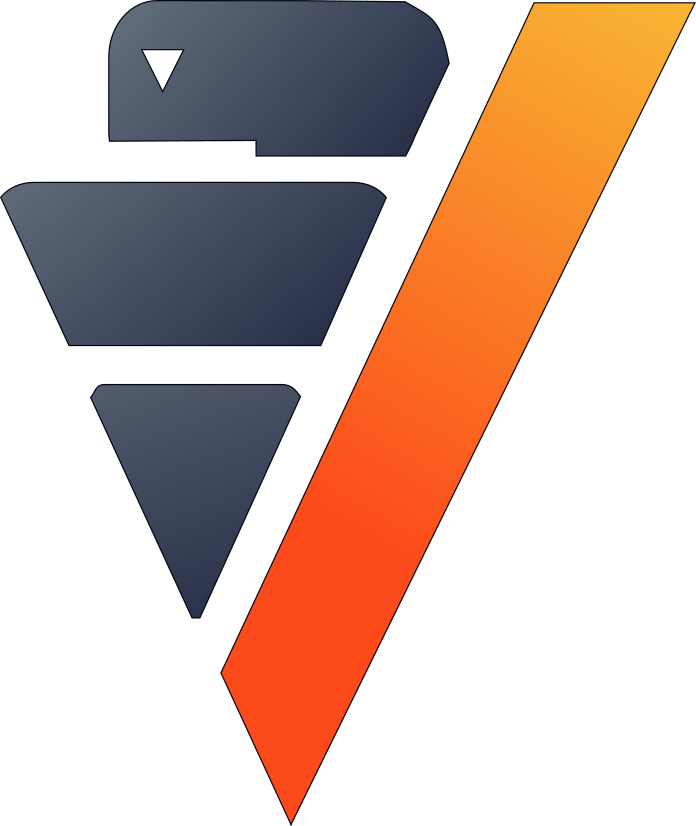

In [19]:
churn

dtype    unique    count                 top   \\
"customerID"             varchar(20)      7043     7043          0002-ORFBO   \\
"gender"                 varchar(20)         2     7043                Male   \\
"SeniorCitizen"                  int         2     7043                   0   \\
"Partner"                    boolean         2     7043                   0   \\
"Dependents"                 boolean         2     7043                   0   \\
"tenure"                         int        73     7043                   1   \\
"PhoneService"               boolean         2     7043                   1   \\
"MultipleLines"         varchar(100)         3     7043                  No   \\
"InternetService"        varchar(22)         3     7043         Fiber optic   \\
"OnlineSecurity"         varchar(38)         3     7043                  No   \\
"OnlineBackup"           varchar(38)         3     7043                  No   \\
"DeviceProtection"       varchar(38)         3     7043                  No   \\
"TechSupport"            varchar(38)         3     7043                  No   \\
"StreamingTV"            varchar(38)         3     7043                  No   \\
"StreamingMovies"        varchar(38)         3     7043                  No   \\
"Contract"               varchar(28)         3     7043      Month-to-month   \\
"PaperlessBilling"           boolean         2     7043                   1   \\
"PaymentMethod"          varchar(50)         4     7043    Electronic check   \\
"MonthlyCharges"        numeric(8,3)      1585     7043               20.05   \\
"TotalCharges"          numeric(9,3)      6530     7032                None   \\
"Churn"                      boolean         2     7043                   0   \\
                        top_percent  
"customerID"                  0.014  
"gender"                     50.476  
"SeniorCitizen"              83.785  
"Partner"                    51.697  
"Dependents"                 70.041  
"tenure"                      8.704  
"PhoneService"               90.317  
"MultipleLines"              48.133  
"InternetService"            43.959  
"OnlineSecurity"             49.666  
"OnlineBackup"               43.845  
"DeviceProtection"           43.944  
"TechSupport"                49.311  
"StreamingTV"                39.898  
"StreamingMovies"            39.543  
"Contract"                   55.019  
"PaperlessBilling"           59.222  
"PaymentMethod"              33.579  
"MonthlyCharges"              0.866  
"TotalCharges"                0.156  
"Churn"                      73.463  
Rows: 1-21 | Columns: 6
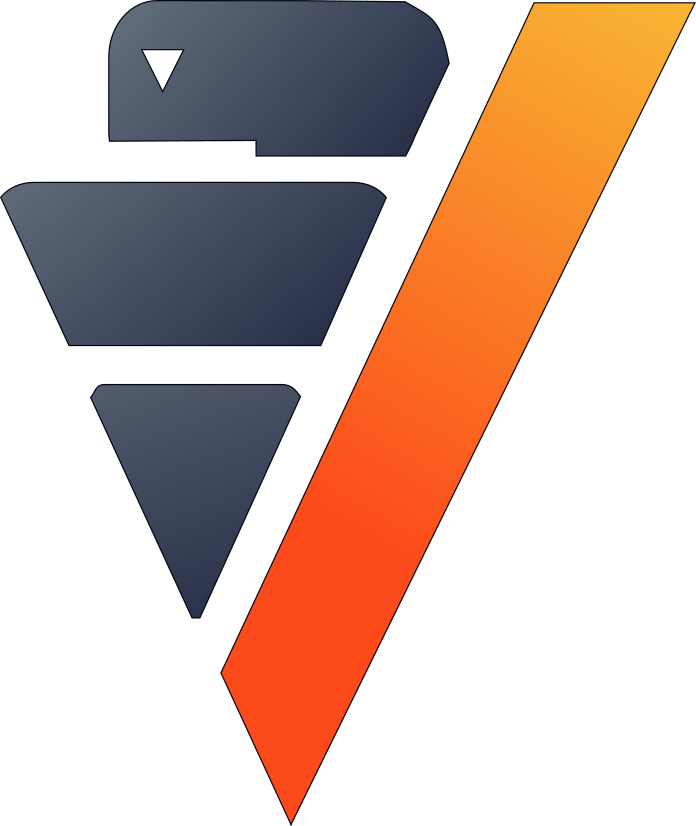

In [18]:
churn.describe(method = "categorical")

Several variables are categorical, and since they all have low cardinalities, we can compute their dummies. We can also convert all booleans to numeric.

In [20]:
for column in ["DeviceProtection", 
               "MultipleLines",
               "PaperlessBilling",
               "Churn",
               "TechSupport",
               "Partner",
               "StreamingTV",
               "OnlineBackup",
               "Dependents",
               "OnlineSecurity",
               "PhoneService",
               "StreamingMovies"]:
    churn[column].decode("Yes",1,0)

In [ ]:
#churn

SeniorCitizen    Partner    Dependents    tenure    PhoneService   \\
1                  0          0             0         9               1   \\
2                  0          0             0         4               1   \\
3                  1          1             0        13               1   \\
4                  1          0             0         7               1   \\
5                  0          0             0        54               0   \\
6                  1          0             0         1               1   \\
7                  0          1             1         1               0   \\
8                  0          1             1        54               1   \\
9                  0          0             0        26               1   \\
10                 0          0             0        67               1   \\
11                 0          1             1        12               1   \\
12                 0          0             0        14               1   \\
13                 0          0             0        64               1   \\
14                 0          1             1        39               1   \\
15                 1          0             0        40               1   \\
16                 0          0             0        40               1   \\
17                 1          0             0        11               1   \\
18                 0          1             0         6               1   \\
19                 0          0             0        27               1   \\
20                 0          1             0        57               1   \\
21                 0          0             1         1               1   \\
22                 1          1             1        32               1   \\
23                 0          1             1        37               0   \\
24                 1          0             0        26               1   \\
25                 0          0             0         7               1   \\
26                 0          0             0        66               1   \\
27                 1          0             0        27               1   \\
28                 0          1             0        22               1   \\
29                 0          0             0        72               1   \\
30                 0          1             1        71               1   \\
31                 1          1             0        33               1   \\
32                 0          0             0         3               1   \\
33                 0          1             1        62               1   \\
34                 0          0             1        25               0   \\
35                 1          0             0        30               1   \\
36                 1          1             0         6               1   \\
37                 1          0             0        66               1   \\
38                 0          0             0        70               1   \\
39                 0          0             0        25               1   \\
40                 0          1             1        46               1   \\
41                 0          0             0        15               1   \\
42                 0          1             1        71               1   \\
43                 0          1             0        30               1   \\
44                 0          0             1        10               1   \\
45                 0          0             0        19               1   \\
46                 0          0             0         1               1   \\
47                 0          1             0        50               1   \\
48                 0          0             0        46               1   \\
49                 0          1             1        48               1   \\
50                 0          1             1        67               1   \\
51                 0          1             1        16               1   \\
52 
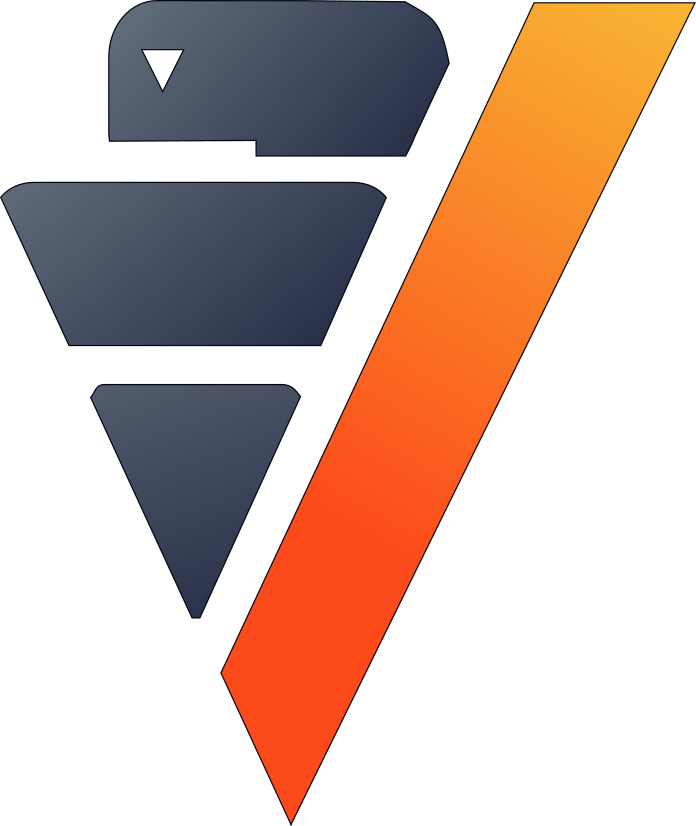

In [21]:
churn.get_dummies().drop(["customerID", 
                          "gender", 
                          "Contract", 
                          "PaymentMethod", 
                          "InternetService"])

SeniorCitizen    Partner    Dependents    tenure    PhoneService   \\
1                  1          1             0         3               1   \\
2                  1          1             0        71               1   \\
3                  0          1             1        65               1   \\
4                  0          1             1        72               1   \\
5                  0          0             0        56               0   \\
6                  0          1             1        71               1   \\
7                  1          1             0        50               1   \\
8                  0          1             1        23               1   \\
9                  0          1             1        55               1   \\
10                 0          1             1        69               1   \\
11                 0          1             1        37               1   \\
12                 0          1             0        49               1   \\
13                 0          1             1        20               0   \\
14                 0          1             0        55               1   \\
15                 0          1             0        59               1   \\
16                 0          1             1        27               1   \\
17                 1          0             0         2               1   \\
18                 0          1             1        25               1   \\
19                 0          0             1        29               0   \\
20                 0          1             0        72               1   \\
21                 0          0             0        35               1   \\
22                 0          0             0         1               1   \\
23                 0          0             0        29               1   \\
24                 0          0             0        30               1   \\
25                 1          1             0        70               1   \\
26                 0          1             0        58               1   \\
27                 0          1             1        16               1   \\
28                 0          1             0        49               1   \\
29                 0          1             0        10               1   \\
30                 0          1             1        61               1   \\
31                 0          0             1        26               0   \\
32                 0          1             0        72               1   \\
33                 0          1             1        44               1   \\
34                 1          0             0        44               1   \\
35                 0          0             0        12               1   \\
36                 1          1             0        69               1   \\
37                 0          0             0        26               1   \\
38                 0          0             0        25               1   \\
39                 0          0             0        71               1   \\
40                 1          1             0         7               1   \\
41                 1          1             0        58               1   \\
42                 0          1             0        54               1   \\
43                 0          1             0        70               0   \\
44                 0          0             0        30               1   \\
45                 1          0             0        52               0   \\
46                 0          1             1         8               1   \\
47                 0          0             0         3               1   \\
48                 0          0             0         1               1   \\
49                 0          1             1        48               0   \\
50                 0          1             1        72               1   \\
51                 0          1             1        72               1   \\
52 
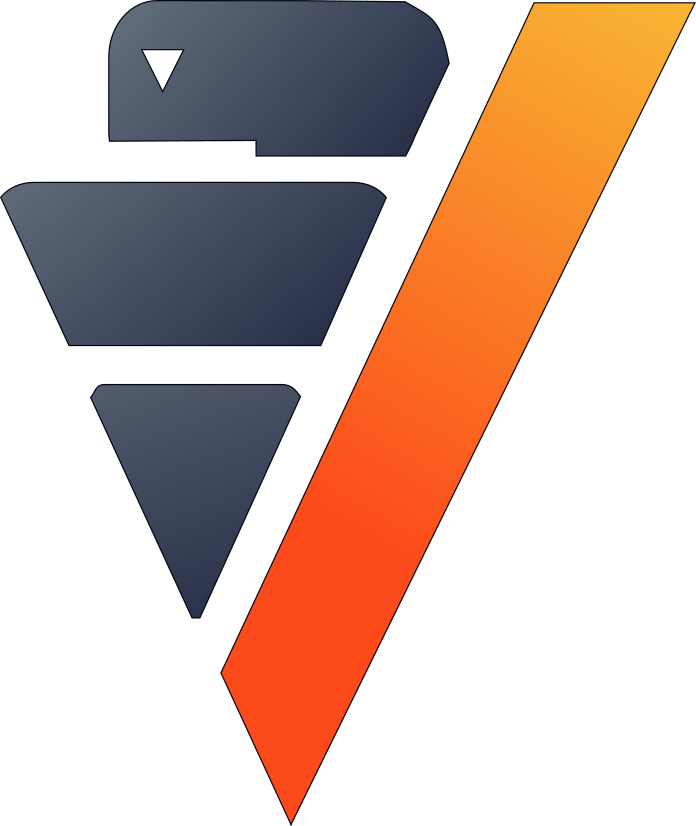

In [24]:
churn

Let's compute the correlations between the different variables and the response column. Finding these relationships is one of the main purposes of data science, and understanding these correlations can help us make better decisions.

"Churn"  
"Churn"                                       1.0  
"Contract_Month-to-month"                   0.405  
"tenure"                                   -0.352  
"InternetService_Fiber_optic"               0.308  
"PaymentMethod_Electronic_check"            0.302  
"TotalCharges"                             -0.199  
"MonthlyCharges"                            0.193  
"PaperlessBilling"                          0.192  
"Contract_One_year"                        -0.178  
"OnlineSecurity"                           -0.171  
"TechSupport"                              -0.165  
"Dependents"                               -0.164  
"SeniorCitizen"                             0.151  
"Partner"                                   -0.15  
"PaymentMethod_Credit_card_(automatic)"    -0.134  
"InternetService_DSL"                      -0.124  
"PaymentMethod_Bank_transfer_(automat...   -0.118  
"OnlineBackup"                             -0.082  
"DeviceProtection"                         -0.066  
"StreamingTV"                               0.063  
"StreamingMovies"                           0.061  
"MultipleLines"                              0.04  
"PhoneService"                              0.012  
"gender_Female"                             0.009  
Rows: 1-24 | Columns: 2
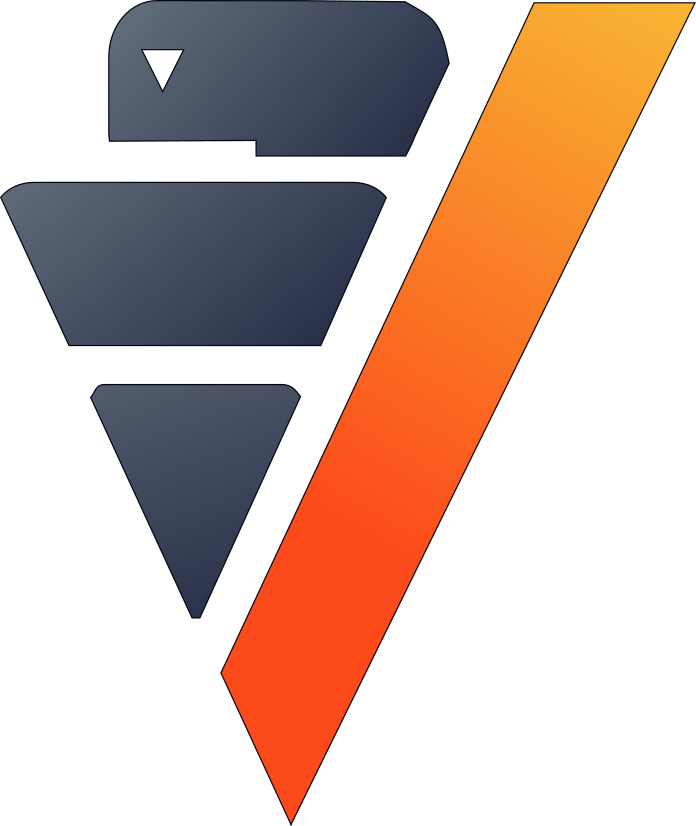

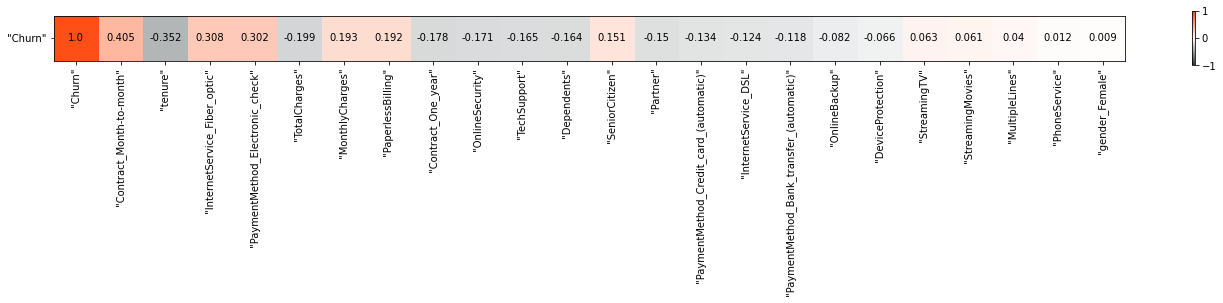

In [26]:
%matplotlib inline
churn.corr(focus = 'Churn')

"SeniorCitizen"                "Partner"            "Dependents"   \\
"SeniorCitizen"                                           1.0       0.0164786575974139      -0.211185088493958   \\
"Partner"                                  0.0164786575974139                      1.0       0.452676282929464   \\
"Dependents"                               -0.211185088493958        0.452676282929464                     1.0   \\
"tenure"                                   0.0165668776818093        0.379697461168293       0.159712331216918   \\
"PhoneService"                            0.00857640107927944        0.017705663223972    -0.00176167854468371   \\
"MultipleLines"                             0.142948174762762        0.142057079362286     -0.0245258044141006   \\
"OnlineSecurity"                          -0.0386527044971951        0.143106227502644      0.0809716602324835   \\
"OnlineBackup"                             0.0665721351451346        0.141498019472281      0.0236710130105134   \\
"DeviceProtection"                          0.059428494286933        0.153786435630779      0.0139625356537902   \\
"TechSupport"                             -0.0606245906935632        0.119998869764316      0.0632681413996536   \\
"StreamingTV"                               0.105377667842824        0.124665800564917     -0.0165577429510374   \\
"StreamingMovies"                           0.120176251188966        0.117411854471945     -0.0397409620589235   \\
"PaperlessBilling"                          0.156529559311173       -0.014876622287891      -0.111377229193644   \\
"MonthlyCharges"                            0.220173338576271       0.0968479362564762      -0.113890230021934   \\
"TotalCharges"                              0.102410605395331        0.319072363238568      0.0646532494217733   \\
"Churn"                                     0.150889328176473       -0.150447544959177      -0.164221401579725   \\
"gender_Female"                           0.00187371163826074      0.00180807966178902     -0.0105166119227341   \\
"InternetService_DSL"                      -0.108322213698583    -0.000850924773952092      0.0520103480646735   \\
"InternetService_Fiber_optic"               0.255337772955128     0.000303665416464253      -0.165818358755423   \\
"Contract_Month-to-month"                   0.138360464402643       -0.280865226108315      -0.231720166129716   \\
"Contract_One_year"                       -0.0462624429270194       0.0827833074814833      0.0683684804382201   \\
"PaymentMethod_Bank_transfer_(automat...  -0.0161589408621996        0.110706369524778      0.0520209809474006   \\
"PaymentMethod_Credit_card_(automatic)"   -0.0241353723603189       0.0820291964573261      0.0602670001763671   \\
"PaymentMethod_Electronic_check"            0.171717778690937      -0.0838516893627101      -0.150642488479113   \\
                                                      "tenure"           "PhoneService"         "MultipleLines"   \\
"SeniorCitizen"                             0.0165668776818093      0.00857640107927944       0.142948174762762   \\
"Partner"                                    0.379697461168293        0.017705663223972       0.142057079362286   \\
"Dependents"                                 0.159712331216918     -0.00176167854468371     -0.0245258044141006   \\
"tenure"                                                   1.0      0.00844820673274375       0.331940555609186   \\
"PhoneService"                             0.00844820673274375                      1.0       0.279689994742913   \\
"MultipleLines"                              0.331940555609186        0.279689994742913                     1.0   \\
"OnlineSecurity"                             0.327202773168245       -0.092892700112209      0.0981081396972639   \\
"OnlineBackup"                               0.360276988984674      -0.0523122429476356       0.202237016320495   \\
"DeviceProtection"                           0.360652866932473      -0.0712268867174749      
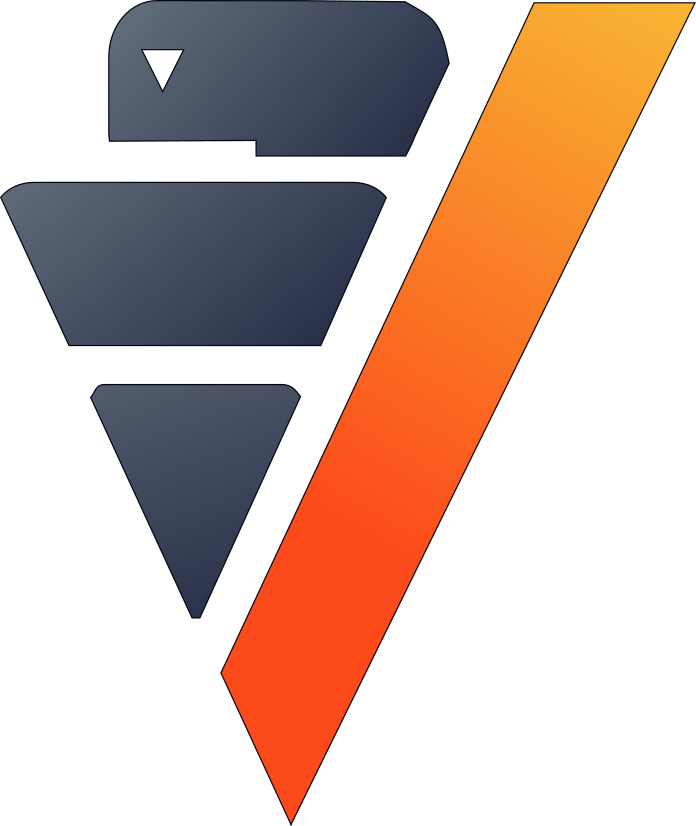

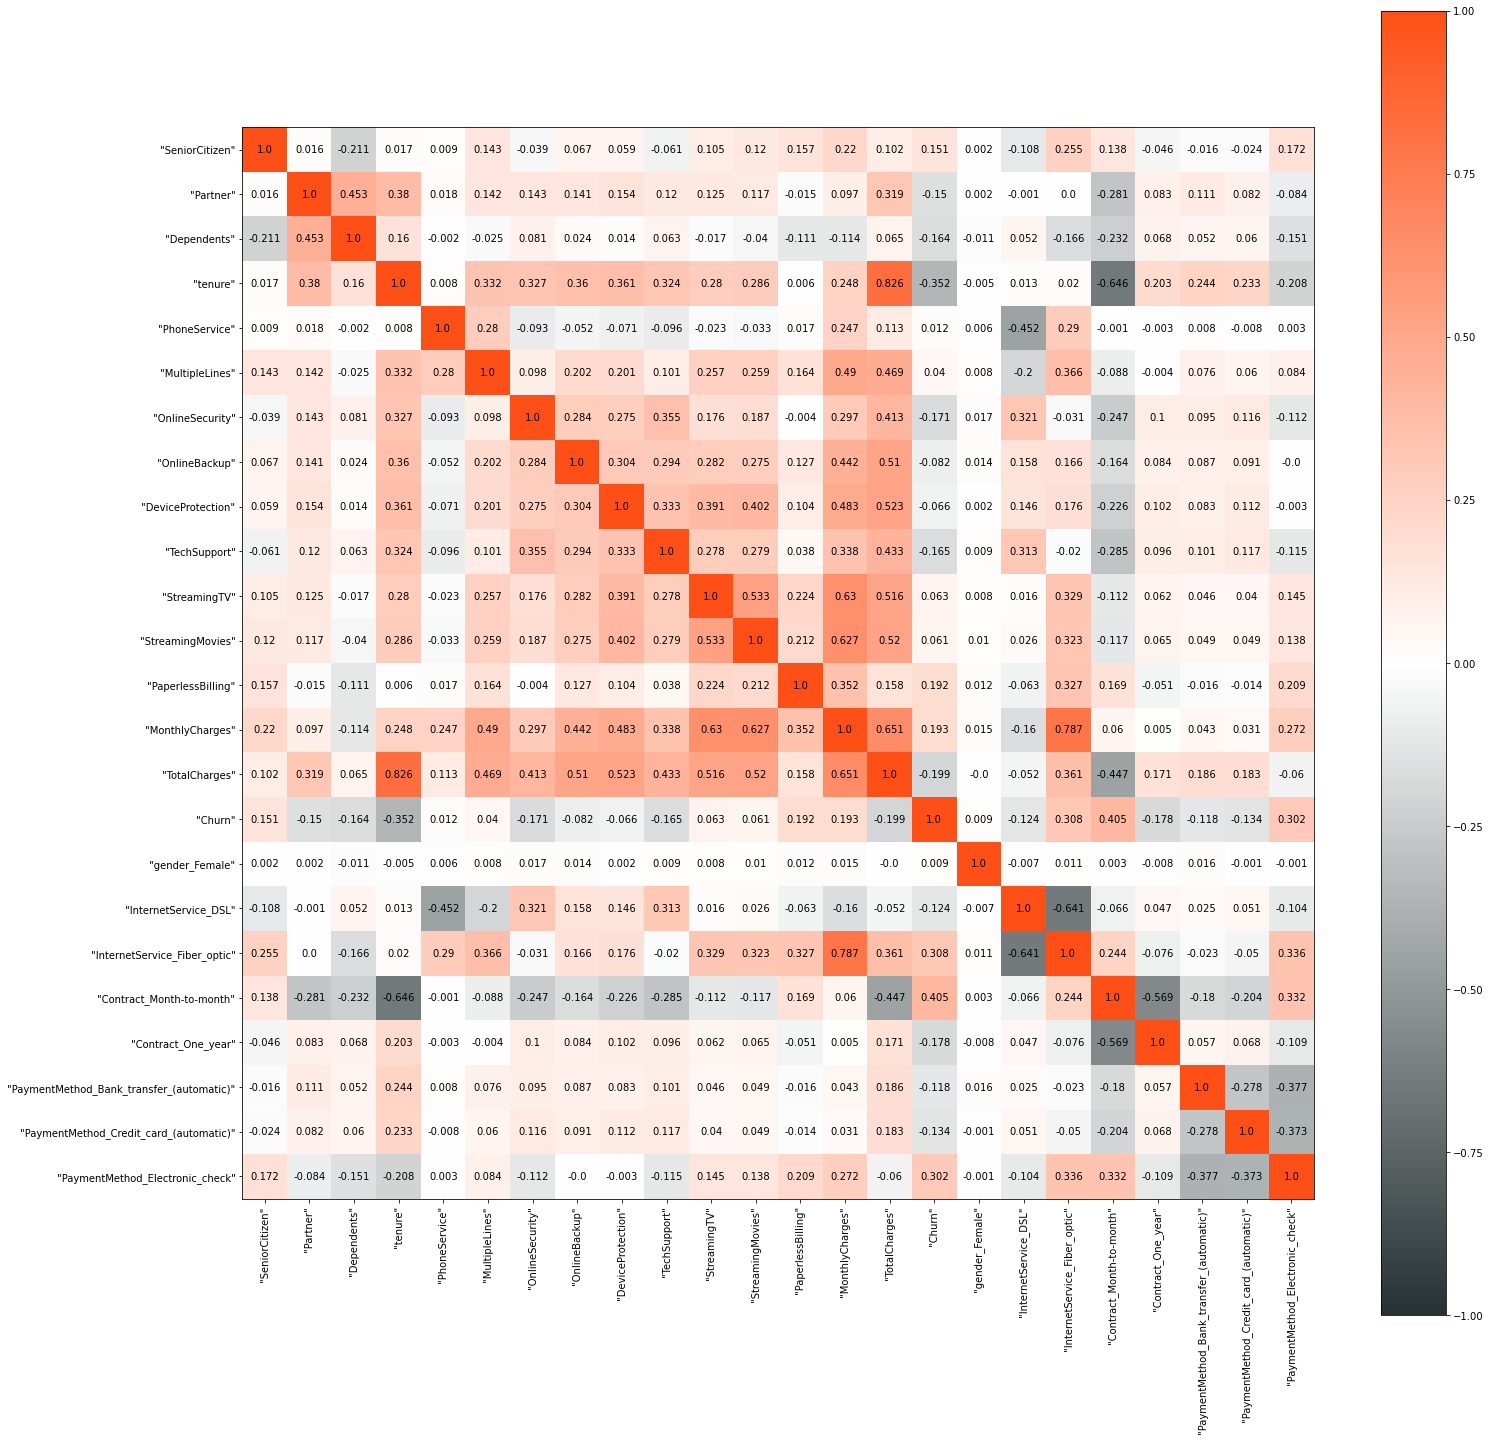

In [27]:
churn.corr(method = 'pearson')

Many features have a strong correlation with the 'Churn' variable. For example, the customers that have a 'Month to Month' contract are more likely to churn. Having this type of contract gives customers a lot of flexibility and allows them to leave at any time. New customers are also likely to churn.

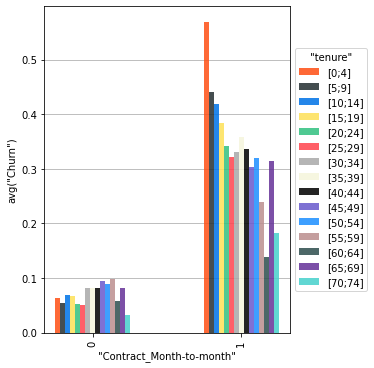

In [28]:
# No lock-in = Churn
churn.hist(["Contract_Month-to-month", "tenure"], method = "avg", of = "Churn")

The following scatter plot shows that providing better plans can prevent churning. Indeed, customers having high total charges are more likely to churn even if they've been with the company for a long time.

This pulls data from the database, we're not limited by memory, Python wouldn't be able plot TBs, but VerticaPy can.

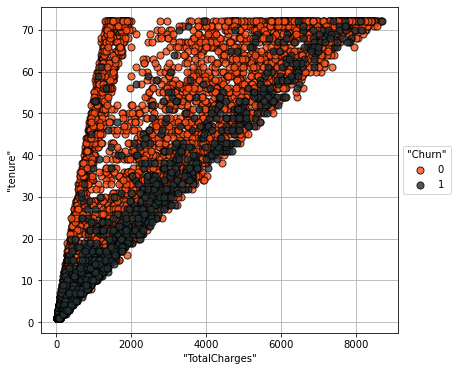

In [29]:
churn.scatter(["TotalCharges", "tenure"], catcol = "Churn")

Let's move on to machine learning.

## Machine Learning

Logistic regression is a very powerful algorithm that can detect churns. Let's use a cross validation to evaluate our model.

auc                 prc_auc                accuracy   \\
1-fold        0.8510600284684425      0.6652906692080041      0.7704347826086957   \\
2-fold        0.8405272458357109      0.6298902094575574      0.7414012738853503   \\
3-fold        0.8381334819441628      0.6540530859869731      0.7428326914848096   \\
avg           0.8432402520827721      0.6497446548841782      0.7515562493262852   \\
std         0.006877078117451966    0.018089225289143734    0.016364947395495093   \\
                         log_loss               precision                 recall   \\
1-fold          0.178026949417772      0.5424688561721405     0.7943615257048093   \\
2-fold          0.183848520546838      0.5097847358121331     0.8282988871224165   \\
3-fold          0.184426539138141       0.508682328907048     0.8058252427184466   \\
avg             0.182100669700917      0.5203119736304406     0.8094952185152241   \\
std         0.0035397632804967643    0.019196338406610523    0.01726376745554176   \\
                       f1_score                     mcc            informedness   \\
1-fold       0.7778093136633132      0.5030821960984122      0.5562943483329765   \\
2-fold       0.7644461426147657      0.4803011262464726      0.5380323749555567   \\
3-fold       0.7606026847674423     0.47020376192856916       0.526011397459575   \\
avg          0.7676193803485071     0.48452902809115134      0.5401127069160361   \\
std         0.00903156120370031    0.016842037402623057    0.015248282336038907   \\
                     markedness                     csi                  time  
1-fold       0.4549600347183649      0.4756703078450844    15.175662994384766  
2-fold      0.42876448074836704     0.46106194690265484    15.574974060058594  
3-fold      0.42031708590262973      0.4531392174704277    16.383008003234863  
avg          0.4346805337897872       0.463290490739389    15.711215019226074  
std         0.01806331194310955    0.011429668153184568    0.6150948640778647  
Rows: 1-5 | Columns: 13
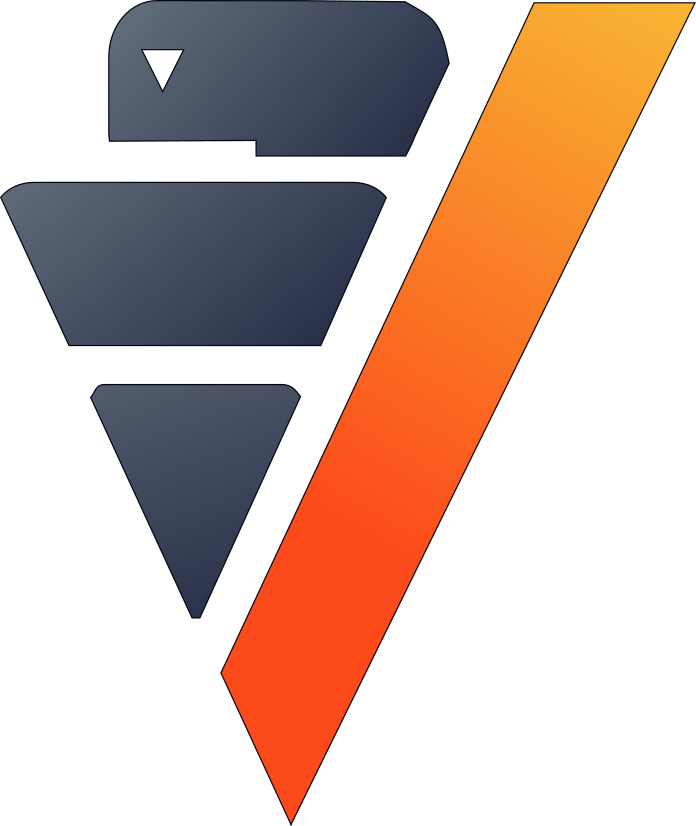

In [30]:
from verticapy.learn.linear_model import LogisticRegression
model = LogisticRegression("churn_model", 
                           penalty = 'L2', 
                           tol = 1e-6, 
                           max_iter = 1000, 
                           solver = "BFGS")

from verticapy.learn.model_selection import cross_validate
cross_validate(model, churn, churn.get_columns(exclude_columns = ["churn"]), 'churn')
#results

The model is excellent! Let's run some machine learning on the entire dataset and compute the importance of each feature.


importance    sign  
tenure                                         28.58      -1  
totalcharges                                   18.43       1  
contract_month-to-month                         8.66       1  
internetservice_fiber_optic                      7.0       1  
monthlycharges                                  5.79       1  
phoneservice                                    5.26      -1  
contract_one_year                               4.31       1  
internetservice_dsl                             3.58       1  
onlinesecurity                                  2.93      -1  
techsupport                                     2.81      -1  
paymentmethod_electronic_check                   2.4       1  
paperlessbilling                                2.29       1  
seniorcitizen                                   1.45       1  
onlinebackup                                     1.4      -1  
multiplelines                                   1.34       1  
dependents                                      0.97      -1  
streamingmovies                                 0.73       1  
streamingtv                                     0.68       1  
deviceprotection                                0.63      -1  
paymentmethod_bank_transfer_(automatic)         0.39       1  
paymentmethod_credit_card_(automatic)           0.21      -1  
gender_female                                   0.17       1  
partner                                          0.0      -1  
Rows: 1-23 | Columns: 3
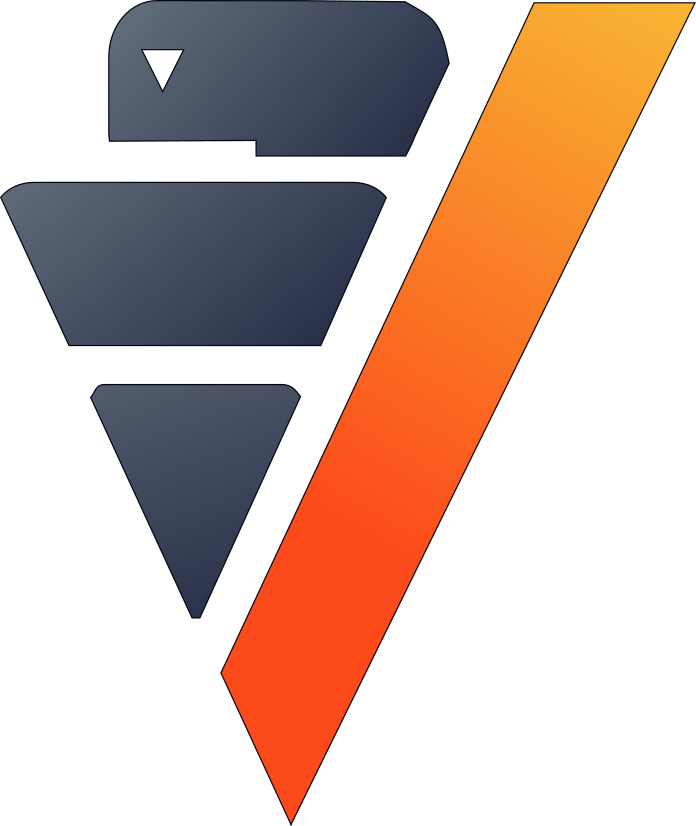

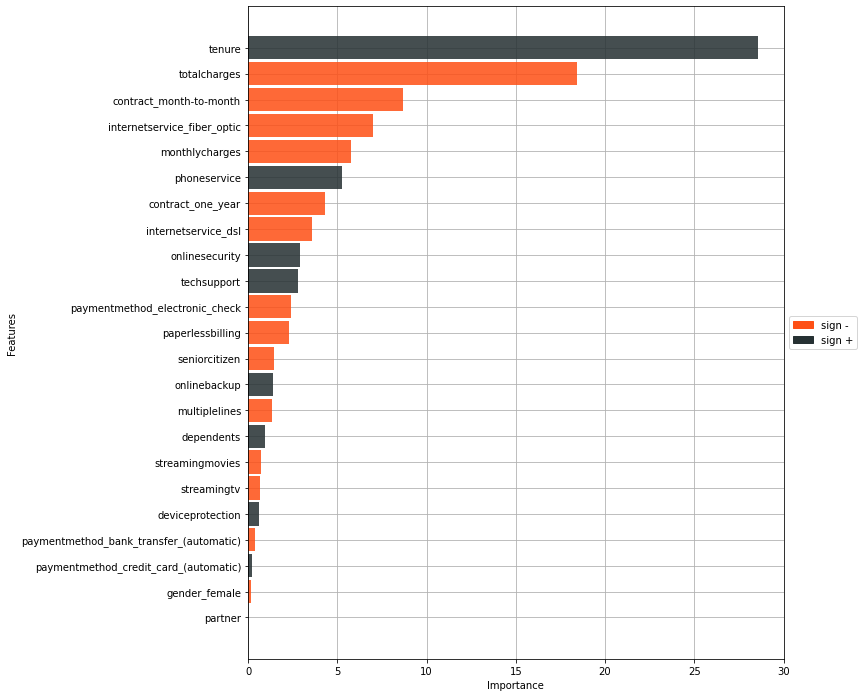

In [31]:
model.fit(churn, 
          churn.get_columns(exclude_columns = ["churn"]), 
          'churn')
model.features_importance()
# We can use all the variables without limiting performance

threshold          false_positive          true_positive  
1                    0.0                     1.0                    1.0  
2     0.0333333333333333       0.715475498741042       0.98501872659176  
3     0.0666666666666667       0.594228161921364      0.968432316746924  
4                    0.1       0.511330621731551      0.945425361155698  
5      0.133333333333333       0.450706953321712      0.926163723916533  
6      0.166666666666667       0.403253922138292      0.906902086677368  
7                    0.2       0.355413519271741       0.86677367576244  
8      0.233333333333333       0.305636257989541      0.837881219903692  
9      0.266666666666667       0.269029633933759      0.807383627608347  
10                   0.3       0.235134611659888      0.771000535045479  
11     0.333333333333333         0.2107301956227      0.734082397003745  
12     0.366666666666667       0.188068952159597      0.696629213483146  
13                   0.4       0.164632965330234      0.670411985018727  
14     0.433333333333333       0.143714894441216      0.629213483146067  
15     0.466666666666667       0.121053650978114      0.593900481540931  
16                   0.5       0.102847181871005      0.553237025147137  
17     0.533333333333333       0.083672283556072      0.507223113964687  
18     0.566666666666667      0.0697269029633934      0.454788657035848  
19                   0.6      0.0546194073213248      0.389513108614232  
20     0.633333333333333      0.0393182258376913      0.324237560192616  
21     0.666666666666667      0.0282781328684873      0.267522739432852  
22                   0.7      0.0174317257408483      0.193686463349385  
23     0.733333333333333     0.00852217702885919      0.128945960406635  
24     0.766666666666667     0.00406740267286461     0.0615302300695559  
25                   0.8    0.000581057524694945     0.0208667736757624  
26     0.833333333333333    0.000193685841564982    0.00535045478865704  
27     0.866666666666667                     0.0                    0.0  
28                   0.9                     0.0                    0.0  
29     0.933333333333333                     0.0                    0.0  
30     0.966666666666667                     0.0                    0.0  
31                   1.0                     0.0                    0.0  
Rows: 1-31 | Columns: 3
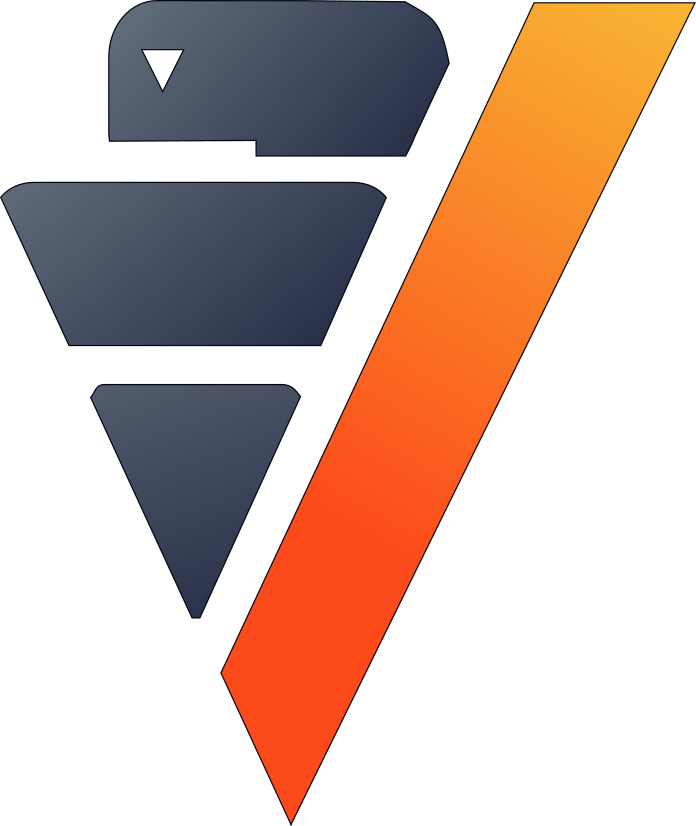

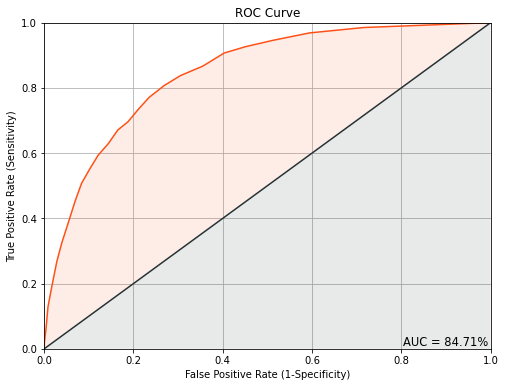

In [32]:
model.roc_curve()

In [38]:
model.predict(churn,
              X = churn.get_columns(exclude_columns = ["churn"]),
              name = 'pred_probs2')

QueryError: Severity: ERROR, Message: Error calling setup() in User Function predict_logistic_reg at [src/Common/GPredict.cpp:51], error code: 0, message: Error in setup: [The expected number of predictors is 23, while 24 is received], Sqlstate: VP001, Routine: setupUDSF, File: /data/qb_workspaces/jenkins2/PrimaryBuilds/build_master/build/vertica/Catalog/LanguageSupport.cpp, Line: 461, Error Code: 5861, SQL: 'SELECT "SeniorCitizen" AS "SeniorCitizen", "Partner" AS "Partner", "Dependents" AS "Dependents", "tenure" AS "tenure", "PhoneService" AS "PhoneService", "MultipleLines" AS "MultipleLines", "OnlineSecurity" AS "OnlineSecurity", "OnlineBackup" AS "OnlineBackup", "DeviceProtection" AS "DeviceProtection", "TechSupport" AS "TechSupport", "StreamingTV" AS "StreamingTV", "StreamingMovies" AS "StreamingMovies", "PaperlessBilling" AS "PaperlessBilling", "MonthlyCharges" AS "MonthlyCharges", "TotalCharges" AS "TotalCharges", "Churn" AS "Churn", "gender_Female" AS "gender_Female", "InternetService_DSL" AS "InternetService_DSL", "InternetService_Fiber_optic" AS "InternetService_Fiber_optic", "Contract_Month-to-month" AS "Contract_Month-to-month", "Contract_One_year" AS "Contract_One_year", "PaymentMethod_Bank_transfer_(automatic)" AS "PaymentMethod_Bank_transfer_(automatic)", "PaymentMethod_Credit_card_(automatic)" AS "PaymentMethod_Credit_card_(automatic)", "PaymentMethod_Electronic_check" AS "PaymentMethod_Electronic_check", "pred_probs" AS "pred_probs", "pred_probs2" AS "pred_probs2" FROM (SELECT "SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "MonthlyCharges", "TotalCharges", "Churn", "gender_Female", "InternetService_DSL", "InternetService_Fiber_optic", "Contract_Month-to-month", "Contract_One_year", "PaymentMethod_Bank_transfer_(automatic)", "PaymentMethod_Credit_card_(automatic)", "PaymentMethod_Electronic_check", "pred_probs", PREDICT_LOGISTIC_REG("SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "MonthlyCharges", "TotalCharges", "gender_Female", "InternetService_DSL", "InternetService_Fiber_optic", "Contract_Month-to-month", "Contract_One_year", "PaymentMethod_Bank_transfer_(automatic)", "PaymentMethod_Credit_card_(automatic)", "PaymentMethod_Electronic_check", "pred_probs" USING PARAMETERS model_name = \'churn_model\', type = \'probability\', match_by_pos = \'true\') AS "pred_probs2" FROM (SELECT "SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "MonthlyCharges", "TotalCharges", "Churn", "gender_Female", "InternetService_DSL", "InternetService_Fiber_optic", "Contract_Month-to-month", "Contract_One_year", "PaymentMethod_Bank_transfer_(automatic)", "PaymentMethod_Credit_card_(automatic)", "PaymentMethod_Electronic_check", PREDICT_LOGISTIC_REG("SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "MonthlyCharges", "TotalCharges", "gender_Female", "InternetService_DSL", "InternetService_Fiber_optic", "Contract_Month-to-month", "Contract_One_year", "PaymentMethod_Bank_transfer_(automatic)", "PaymentMethod_Credit_card_(automatic)", "PaymentMethod_Electronic_check" USING PARAMETERS model_name = \'churn_model\', type = \'probability\', match_by_pos = \'true\') AS "pred_probs" FROM (SELECT "SeniorCitizen", DECODE("Partner", \'Yes\', 1, 0) AS "Partner", DECODE("Dependents", \'Yes\', 1, 0) AS "Dependents", "tenure", DECODE("PhoneService", \'Yes\', 1, 0) AS "PhoneService", DECODE("MultipleLines", \'Yes\', 1, 0) AS "MultipleLines", DECODE("OnlineSecurity", \'Yes\', 1, 0) AS "OnlineSecurity", DECODE("OnlineBackup", \'Yes\', 1, 0) AS "OnlineBackup", DECODE("DeviceProtection", \'Yes\', 1, 0) AS "DeviceProtection", DECODE("TechSupport", \'Yes\', 1, 0) AS "TechSupport", DECODE("StreamingTV", \'Yes\', 1, 0) AS "StreamingTV", DECODE("StreamingMovies", \'Yes\', 1, 0) AS "StreamingMovies", DECODE("PaperlessBilling", \'Yes\', 1, 0) AS "PaperlessBilling", "MonthlyCharges", "TotalCharges", DECODE("Churn", \'Yes\', 1, 0) AS "Churn", DECODE("gender_Female", \'Female\', 1, 0) AS "gender_Female", DECODE("InternetService_DSL", \'DSL\', 1, 0) AS "InternetService_DSL", DECODE("InternetService_Fiber_optic", \'Fiber optic\', 1, 0) AS "InternetService_Fiber_optic", DECODE("Contract_Month-to-month", \'Month-to-month\', 1, 0) AS "Contract_Month-to-month", DECODE("Contract_One_year", \'One year\', 1, 0) AS "Contract_One_year", DECODE("PaymentMethod_Bank_transfer_(automatic)", \'Bank transfer (automatic)\', 1, 0) AS "PaymentMethod_Bank_transfer_(automatic)", DECODE("PaymentMethod_Credit_card_(automatic)", \'Credit card (automatic)\', 1, 0) AS "PaymentMethod_Credit_card_(automatic)", DECODE("PaymentMethod_Electronic_check", \'Electronic check\', 1, 0) AS "PaymentMethod_Electronic_check" FROM (SELECT "SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "MonthlyCharges", "TotalCharges", "Churn", "gender" AS "gender_Female", "InternetService" AS "InternetService_DSL", "InternetService" AS "InternetService_Fiber_optic", "Contract" AS "Contract_Month-to-month", "Contract" AS "Contract_One_year", "PaymentMethod" AS "PaymentMethod_Bank_transfer_(automatic)", "PaymentMethod" AS "PaymentMethod_Credit_card_(automatic)", "PaymentMethod" AS "PaymentMethod_Electronic_check" FROM "public"."churn") VERTICAPY_SUBTABLE) VERTICAPY_SUBTABLE) VERTICAPY_SUBTABLE ORDER BY "pred_probs" DESC) VERTICAPY_SUBTABLE LIMIT 100 OFFSET 0'

QueryError: Severity: ERROR, Message: Error calling setup() in User Function predict_logistic_reg at [src/Common/GPredict.cpp:51], error code: 0, message: Error in setup: [The expected number of predictors is 23, while 24 is received], Sqlstate: VP001, Routine: setupUDSF, File: /data/qb_workspaces/jenkins2/PrimaryBuilds/build_master/build/vertica/Catalog/LanguageSupport.cpp, Line: 461, Error Code: 5861, SQL: 'SELECT "SeniorCitizen" AS "SeniorCitizen", "Partner" AS "Partner", "Dependents" AS "Dependents", "tenure" AS "tenure", "PhoneService" AS "PhoneService", "MultipleLines" AS "MultipleLines", "OnlineSecurity" AS "OnlineSecurity", "OnlineBackup" AS "OnlineBackup", "DeviceProtection" AS "DeviceProtection", "TechSupport" AS "TechSupport", "StreamingTV" AS "StreamingTV", "StreamingMovies" AS "StreamingMovies", "PaperlessBilling" AS "PaperlessBilling", "MonthlyCharges" AS "MonthlyCharges", "TotalCharges" AS "TotalCharges", "Churn" AS "Churn", "gender_Female" AS "gender_Female", "InternetService_DSL" AS "InternetService_DSL", "InternetService_Fiber_optic" AS "InternetService_Fiber_optic", "Contract_Month-to-month" AS "Contract_Month-to-month", "Contract_One_year" AS "Contract_One_year", "PaymentMethod_Bank_transfer_(automatic)" AS "PaymentMethod_Bank_transfer_(automatic)", "PaymentMethod_Credit_card_(automatic)" AS "PaymentMethod_Credit_card_(automatic)", "PaymentMethod_Electronic_check" AS "PaymentMethod_Electronic_check", "pred_probs" AS "pred_probs", "pred_probs2" AS "pred_probs2" FROM (SELECT "SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "MonthlyCharges", "TotalCharges", "Churn", "gender_Female", "InternetService_DSL", "InternetService_Fiber_optic", "Contract_Month-to-month", "Contract_One_year", "PaymentMethod_Bank_transfer_(automatic)", "PaymentMethod_Credit_card_(automatic)", "PaymentMethod_Electronic_check", "pred_probs", PREDICT_LOGISTIC_REG("SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "MonthlyCharges", "TotalCharges", "gender_Female", "InternetService_DSL", "InternetService_Fiber_optic", "Contract_Month-to-month", "Contract_One_year", "PaymentMethod_Bank_transfer_(automatic)", "PaymentMethod_Credit_card_(automatic)", "PaymentMethod_Electronic_check", "pred_probs" USING PARAMETERS model_name = \'churn_model\', type = \'probability\', match_by_pos = \'true\') AS "pred_probs2" FROM (SELECT "SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "MonthlyCharges", "TotalCharges", "Churn", "gender_Female", "InternetService_DSL", "InternetService_Fiber_optic", "Contract_Month-to-month", "Contract_One_year", "PaymentMethod_Bank_transfer_(automatic)", "PaymentMethod_Credit_card_(automatic)", "PaymentMethod_Electronic_check", PREDICT_LOGISTIC_REG("SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "MonthlyCharges", "TotalCharges", "gender_Female", "InternetService_DSL", "InternetService_Fiber_optic", "Contract_Month-to-month", "Contract_One_year", "PaymentMethod_Bank_transfer_(automatic)", "PaymentMethod_Credit_card_(automatic)", "PaymentMethod_Electronic_check" USING PARAMETERS model_name = \'churn_model\', type = \'probability\', match_by_pos = \'true\') AS "pred_probs" FROM (SELECT "SeniorCitizen", DECODE("Partner", \'Yes\', 1, 0) AS "Partner", DECODE("Dependents", \'Yes\', 1, 0) AS "Dependents", "tenure", DECODE("PhoneService", \'Yes\', 1, 0) AS "PhoneService", DECODE("MultipleLines", \'Yes\', 1, 0) AS "MultipleLines", DECODE("OnlineSecurity", \'Yes\', 1, 0) AS "OnlineSecurity", DECODE("OnlineBackup", \'Yes\', 1, 0) AS "OnlineBackup", DECODE("DeviceProtection", \'Yes\', 1, 0) AS "DeviceProtection", DECODE("TechSupport", \'Yes\', 1, 0) AS "TechSupport", DECODE("StreamingTV", \'Yes\', 1, 0) AS "StreamingTV", DECODE("StreamingMovies", \'Yes\', 1, 0) AS "StreamingMovies", DECODE("PaperlessBilling", \'Yes\', 1, 0) AS "PaperlessBilling", "MonthlyCharges", "TotalCharges", DECODE("Churn", \'Yes\', 1, 0) AS "Churn", DECODE("gender_Female", \'Female\', 1, 0) AS "gender_Female", DECODE("InternetService_DSL", \'DSL\', 1, 0) AS "InternetService_DSL", DECODE("InternetService_Fiber_optic", \'Fiber optic\', 1, 0) AS "InternetService_Fiber_optic", DECODE("Contract_Month-to-month", \'Month-to-month\', 1, 0) AS "Contract_Month-to-month", DECODE("Contract_One_year", \'One year\', 1, 0) AS "Contract_One_year", DECODE("PaymentMethod_Bank_transfer_(automatic)", \'Bank transfer (automatic)\', 1, 0) AS "PaymentMethod_Bank_transfer_(automatic)", DECODE("PaymentMethod_Credit_card_(automatic)", \'Credit card (automatic)\', 1, 0) AS "PaymentMethod_Credit_card_(automatic)", DECODE("PaymentMethod_Electronic_check", \'Electronic check\', 1, 0) AS "PaymentMethod_Electronic_check" FROM (SELECT "SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "MonthlyCharges", "TotalCharges", "Churn", "gender" AS "gender_Female", "InternetService" AS "InternetService_DSL", "InternetService" AS "InternetService_Fiber_optic", "Contract" AS "Contract_Month-to-month", "Contract" AS "Contract_One_year", "PaymentMethod" AS "PaymentMethod_Bank_transfer_(automatic)", "PaymentMethod" AS "PaymentMethod_Credit_card_(automatic)", "PaymentMethod" AS "PaymentMethod_Electronic_check" FROM "public"."churn") VERTICAPY_SUBTABLE) VERTICAPY_SUBTABLE) VERTICAPY_SUBTABLE ORDER BY "pred_probs" DESC) VERTICAPY_SUBTABLE LIMIT 100 OFFSET 0'

SeniorCitizen    Partner    Dependents    tenure    PhoneService   \\
1                  0          0             1         0               1   \\
2                  0          1             1         0               1   \\
3                  0          1             1         0               1   \\
4                  0          1             1         0               1   \\
5                  0          1             1         0               1   \\
6                  0          1             1         0               1   \\
7                  0          0             1         0               1   \\
8                  0          1             1         0               1   \\
9                  0          1             1         0               1   \\
10                 0          1             1         0               0   \\
11                 0          1             1         0               0   \\
12                 1          1             0         1               1   \\
13                 1          0             0         1               1   \\
14                 1          0             0         1               1   \\
15                 1          1             0         1               1   \\
16                 1          0             0         2               1   \\
17                 1          0             0         2               1   \\
18                 1          0             0         2               1   \\
19                 1          0             0         3               1   \\
20                 1          0             0         4               1   \\
21                 1          0             0         4               1   \\
22                 1          1             0         3               1   \\
23                 1          0             0         1               1   \\
24                 1          0             0         1               1   \\
25                 1          1             0         1               1   \\
26                 0          0             0         1               1   \\
27                 1          0             0         2               1   \\
28                 1          1             0         7               1   \\
29                 1          0             0         2               1   \\
30                 0          0             0         1               1   \\
31                 1          0             0         1               1   \\
32                 0          0             0         1               1   \\
33                 0          0             0         2               1   \\
34                 0          0             0         2               1   \\
35                 1          0             0         1               1   \\
36                 1          0             0         8               1   \\
37                 1          1             0         7               1   \\
38                 0          0             0         3               1   \\
39                 0          1             0         3               1   \\
40                 0          0             0         1               1   \\
41                 1          1             0         3               1   \\
42                 1          0             0         1               1   \\
43                 1          0             0         2               1   \\
44                 1          0             0         9               1   \\
45                 1          0             0         4               1   \\
46                 1          0             0         3               1   \\
47                 1          0             0        10               1   \\
48                 1          1             0        11               1   \\
49                 1          1             0         4               1   \\
50                 0          0             0         3               1   \\
51                 1          0             0         6               1   \\
52 
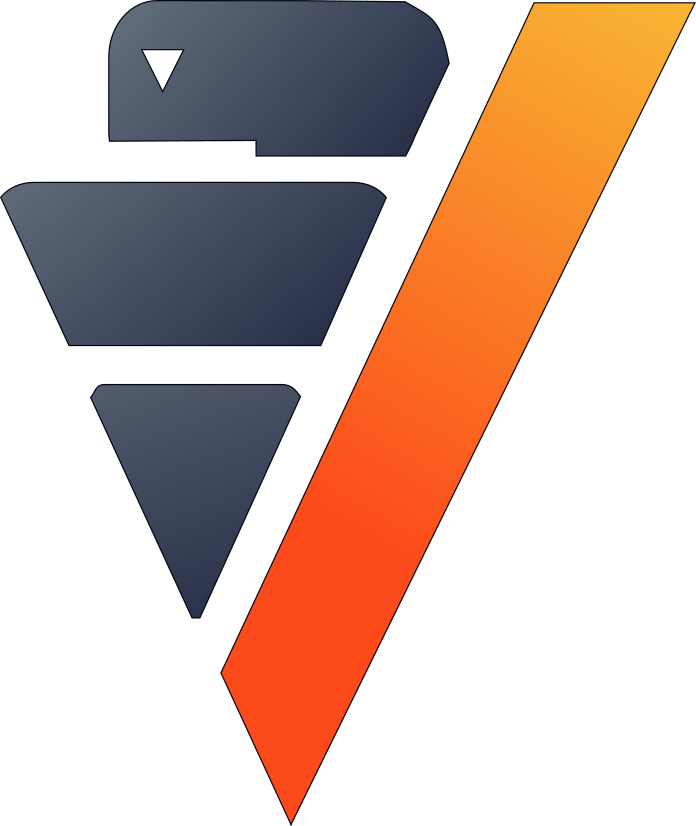

In [34]:
churn.sort({"pred_probs":"desc"})

Based on our model, most churning customers are at least one of the following:
<ul>
 <li>Paying higher bills</li>
 <li>New to Telco customers</li>
 <li>Have a monthly contract</li>
</ul>

Notice that customers have a 'Fiber Optic' option are also likely to churn. Let's check if this relationship is causal by computing some aggregations.

In [35]:
set_option("sql_on", True)

InternetService_Fiber_optic              tenure        totalcharges   \\
1                              0    31.9422346085635    1558.06548526423   \\
2                              1    32.9179586563307    3205.30457041344   \\
     contract_month_to_month      monthlycharges  
1          0.442614644033443    43.7882442361287  
2           0.68733850129199    91.5001291989664  
Rows: 1-2 | Columns: 5
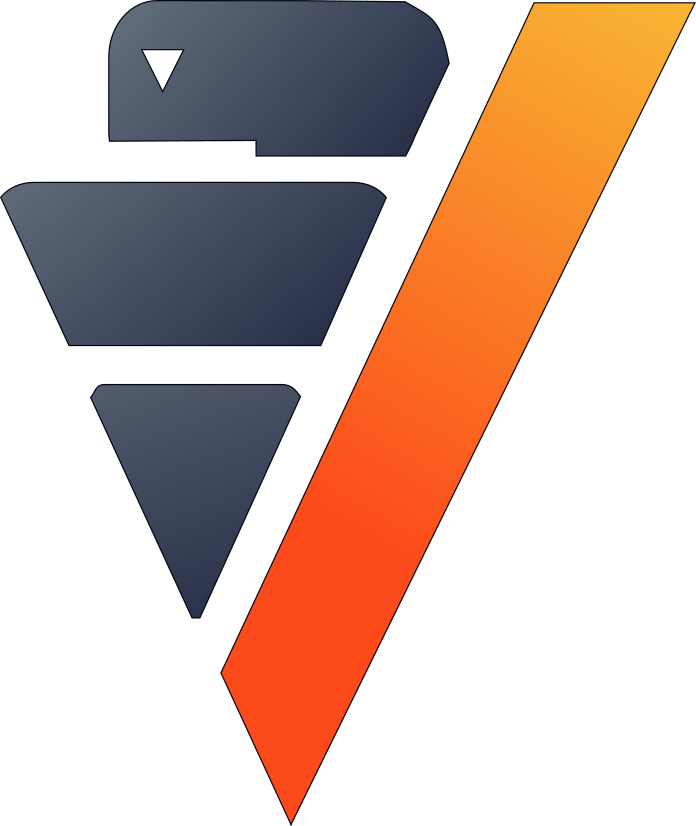

In [36]:
# Is Fiber optic a Bad Option? - VerticaPy
import verticapy.stats as st
churn.groupby(["InternetService_Fiber_optic"], 
              [st.avg(churn["tenure"])._as("tenure"),
               st.avg(churn["totalcharges"])._as("totalcharges"),
               st.avg(churn["contract_month-to-month"])._as("contract_month_to_month"),
               st.avg(churn["monthlycharges"])._as("monthlycharges")])

It seems like the 'Fiber Optic' option in and of itself doesn't lead to churning, but customers that have this option tend to churn because their contract puts them into one of the three categories we listed before: they're paying more.

## Conclusion

We've solved our problem in a Pandas-like way, all without ever loading data into memory!